Given a set of points in a $k$ dimensional space, calculate the nearest neighbour of each point

I found this in a video on YouTube (https://youtu.be/EEUXKG97YRw), and I use it to explain how broadcasting works. Be sure to see the notebook called broadcasting and "nn explanations" for more material

Just as a joke, I have a separate implementation for 1D, then an implementation of the straightforward approach to calculating distances (multiple nested loops). Note the visualisation to quickly check that things look okay. This is generalized to $k$ dimensions and any number of points, and if you want to calculate distances using (say) manhanttan instead of cartesian metrics, just change the formula.

Note that for larger dimensions I'm still plotting points using two co-ordinates, so they may not seem to be the nearest neighbours


Fair warning: there's still a lot of cleanup that needs to be done in the code below, and its not well documented (er, at all!)

___

Generate a list of points on 1 dimension and calculate the nearest neighbour pair
Note that since this is in 1d, sorting and taking the difference between adjacent points is sufficient!

In [42]:
import numpy as np
import random

num_pts = 50
# first as a list
pts = [random.random() for i in range(num_pts)]
#print(pts[:4])
## note that sorting only works for 1-dimension!!
pts.sort()
#print(pts[:4])
#print(pts[-4:])

max_dist = -1



for index in range(num_pts):
    #print(index, len(pts))
    if index+1 < len(pts):
        dist = pts[index+1] - pts[index]
        if max_dist < dist:
            #print("indices: {}:{:.2f} and {}:{:.2f}, updating max_d {:.4f} to d {:.4f}".
            #      format(index, pts[index], index+1, pts[index+1], max_dist, dist))
            max_dist = dist
            
##much more elegant:
p1, p2 = itertools.tee(pts)
next(p2, None)
for p_1, p_2 in zip(p1, p2):
    print(p_1)
    print(p_2)
    print()
    
    
print("max_dist = {:.4f}".format(max_dist))

np_pts = np.array(pts)
print(np_pts.shape, type(np_pts))

max_dist = 0.1195
(50,) <class 'numpy.ndarray'>


___
Now for points in a 2D space. 
For each point, what is its closest neighbour?

In [167]:
import numpy as np
import random
import itertools

num_pts = 20
# points are a list of 2 tuples
pts = [(random.random(), random.random()) for i in range(num_pts)]
#pts = [(2.*i, random.random()) for i in range(num_pts)]
#print(pts[:2])

nearest_neighbours = []
for index, (x1, y1) in enumerate(pts):
    #print("{}: {:.2f},{:.2f}".format(index, x1, y1))
    nearest_neighbour_dist = np.inf
    nearest_neighbour_index = -1
    for index2, (x2, y2) in enumerate(pts):
        if index != index2:            
            dist = (x1 - x2) * (x1 - x2) + (y1 - y2) * (y1 - y2)
            if nearest_neighbour_dist > dist:
                nearest_neighbour_dist = dist
                nearest_neighbour_index = index2        
    #print("{}: {:.2f}, {:.2f} -> {}: {:.2f}, {:.2f} dist = {:.4f}"
    #     .format(index, x1, y1, nearest_neighbour_index, pts[nearest_neighbour_index][0],
    #            pts[nearest_neighbour_index][1], nearest_neighbour_dist))
    nearest_neighbours.append(nearest_neighbour_index)
print(nearest_neighbours)

[(0.6193976328529575, 0.7992972671726107), (0.28163920866683256, 0.6785208805758907)]
[6, 12, 13, 14, 14, 4, 15, 16, 17, 10, 0, 13, 1, 2, 3, 6, 7, 8, 8, 3]


Now let's try do do this using numpy!
I'll use the same pts as before, but convert it to an numpy array

In [166]:
#pts = [(random.random(), random.random()) for i in range(num_pts)]
pts = np.array(pts)
#pts = np.arange(num_pts * 2.).reshape(20,2)
#print(type(pts))
#print(pts.shape)
#print(pts)

pts_r = pts.reshape(num_pts, 1, 2)
#print("pts reshaped")
#print("============")
#print(pts_r.shape)
#print(pts_r)
#print()

#print("diff")
diff = pts_r - pts
#print(diff.shape)
#print(diff)
#print()

#print("diff squared:")
#print("=============")
D = (diff ** 2)
#print(D.shape)
#print(D)
#print()

#print("diff squared summed:")
#print("====================")
D = D.sum(2)
#print(D.shape)
#print(D)

i = np.arange(num_pts)
#print(size)
#print(i)
D[i,i] = np.inf

print()
print("nearest neighbours:")
print("===================")
i = np.argmin(D, 1)
print(i)
#print(D[:,i])


nearest neighbours:
[ 6  5 14 19 16  1 13 17 15  5 18  9 11  6 17  8  1 14 10 14]


This is just plotting the points (and their nearest neighbours)

In [171]:
def nn_trad(pts):
    nearest_neighbours = []
    for index, (x1, y1) in enumerate(pts):
        nearest_neighbour_dist = np.inf
        nearest_neighbour_index = -1
        for index2, (x2, y2) in enumerate(pts):
            if index != index2:            
                dist = (x1 - x2) * (x1 - x2) + (y1 - y2) * (y1 - y2)
                if nearest_neighbour_dist > dist:
                    nearest_neighbour_dist = dist
                    nearest_neighbour_index = index2        
        nearest_neighbours.append(nearest_neighbour_index)
    return nearest_neighbours

def nn_numpy(pts):
    pts = np.array(pts)
    pts_r = pts.reshape(num_pts, 1, 2)
    diff = pts_r - pts
    D = (diff ** 2)
    D = D.sum(2)
    i = np.arange(num_pts)
    D[i,i] = np.inf
    nearest_neighbours = np.argmin(D, 1)
    return nearest_neighbours

In [237]:
def nn_trad_ndim(pts):
    nearest_neighbours = []
    nn_dist = []
    #pt_1 = ()
    for index, pt1 in enumerate(pts):
        nearest_neighbour_dist = np.inf
        nearest_neighbour_index = -1
        for index2, pt2 in enumerate(pts):
            if index != index2:
                dist = 0
                for i1, i2 in zip(pt1, pt2):
                    dist += (i1 - i2) * (i1 - i2)
                if nearest_neighbour_dist > dist:
                    nearest_neighbour_dist = dist
                    nearest_neighbour_index = index2        
        nearest_neighbours.append(nearest_neighbour_index)
        nn_dist.append(nearest_neighbour_dist)
    return nearest_neighbours, nn_dist

def nn_numpy_ndim(pts):
    pts = np.array(pts)
    dim = pts.shape[-1]
    pts_r = pts.reshape(num_pts, 1, dim)
    diff = pts_r - pts
    D = (diff ** 2)
    D = D.sum(2)
    i = np.arange(num_pts)
    D[i,i] = np.inf
    nearest_neighbours = np.argmin(D, 1)
    nn_dist = np.min(D, 1)
    return nearest_neighbours, nn_dist

In [245]:
import numpy as np
import random
import itertools

num_pts = 100
# points are a list of k tuples
pts = [(random.random(),random.random(), random.random(), random.random())
       for i in range(num_pts)]
#pts = [(i, i+1., i+2) for i in range(num_pts)]
#print(pts)
#%timeit nbrs_trad = nn_trad(pts)
#%timeit nbrs_np = nn_numpy(pts)

%timeit nbrs_trad, ndist_trad = nn_trad_ndim(pts)

#print(nbrs_trad)
#print(ndist_trad)

%timeit nbrs_np, ndist_np = nn_numpy_ndim(pts)
#print(nbrs_np)
#print(ndist_np)

print()
print(ndist_np - np.array(ndist_trad))

7.82 ms ± 359 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
387 µs ± 12.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


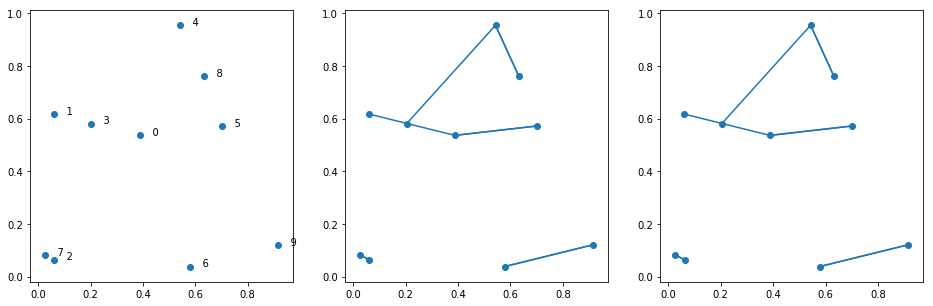

In [244]:
import matplotlib.pyplot as plt
from matplotlib import collections as mc
# same as (?):
#import matplotlib.collections as mc

pts2d = np.array(pts)
#print(pts2d)
pts2d = np.delete(pts2d, np.s_[2:], axis=1)
#print(pts2d)
x = [x1 for x1, y1 in pts2d]
y = [y1 for x1, y1 in pts2d]

fig, ax = plt.subplots(1, 3, figsize = (16, 5))

ax[0].scatter(x, y)
for index, pt in enumerate(pts2d):
    s = str(index)
    s = s.rjust(5)
    ax[0].text(pt[0], pt[1], s)

ax[1].scatter(x, y)

neighbours = []

for index, p1 in enumerate(pts2d):
    neighbours.append([p1, pts2d[nbrs_trad[index]]])
    
#print(neighbours[:2])

line_segments = mc.LineCollection(neighbours)
ax[1].add_collection(line_segments)

ax[2].scatter(x, y)
neighbours = []
for index, p1 in enumerate(pts2d):
    neighbours.append([p1, pts2d[nbrs_np[index]]])
line_segments = mc.LineCollection(neighbours)
ax[2].add_collection(line_segments)
plt.show()

18: min dist 0.011120067087233634 at index 12 v 0.5
18: min dist 0.025063039723930963 at index 11 v 0.5


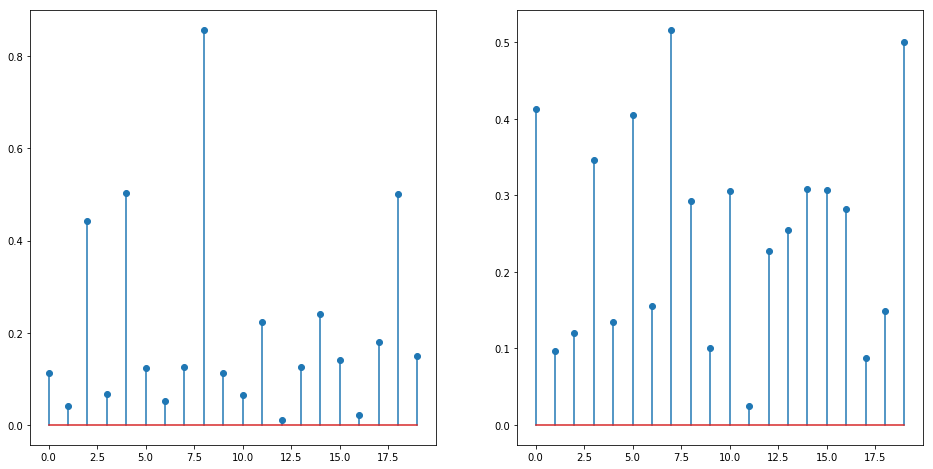

In [133]:
## just trying to see where the bug was in a previous cell, printing 
## values in a row and checking if argmin gives the correct value

fig, ax = plt.subplots(1, 2, figsize=(16, 8))
tmp = D[18].copy()
tmp[18] = 0.5
ax[0].stem(tmp)
i = np.argmin(tmp)
print("18: min dist {} at index {} v {}".format(min(tmp), i, tmp[18]))

tmp = D[19].copy()
tmp[19] = 0.5
i = np.argmin(tmp)
print("18: min dist {} at index {} v {}".format(min(tmp), i, tmp[19]))
ax[1].stem(tmp)

plt.show()

In [61]:
pts = np.array([[1., 2, 3],[4, 5, 6]])
size = 2

#pts = np.array([[1, 2, 3],[4, 5, 6],[7, 8, 9], [10, 11, 12]])
#size = 4

print(pts.shape)
print(pts)
print()

pts_r = pts.reshape(size, 1, 3)
print(pts_r.shape)
print(pts_r)
print()

diff = pts_r - pts
print(diff.shape)
print(diff)
print()

D = (diff ** 2)
print(D.shape)
print(D)
print()

D = D.sum(2)
print(D.shape)
print(D)

i = np.arange(size)
D[i,i] = np.inf

i = np.argmin(D, 1)
print(i)

(2, 3)
[[1. 2. 3.]
 [4. 5. 6.]]

(2, 1, 3)
[[[1. 2. 3.]]

 [[4. 5. 6.]]]

(2, 2, 3)
[[[ 0.  0.  0.]
  [-3. -3. -3.]]

 [[ 3.  3.  3.]
  [ 0.  0.  0.]]]

(2, 2, 3)
[[[0. 0. 0.]
  [9. 9. 9.]]

 [[9. 9. 9.]
  [0. 0. 0.]]]

(2, 2)
[[ 0. 27.]
 [27.  0.]]
[1 0]


In [116]:
np.sum?


In [247]:
Z = np.ones((10,10))
Z[1:-1,1:-1] = 0
Z

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [248]:
print(0 * np.nan)
print(np.nan == np.nan)
print(np.inf > np.nan)
print(np.nan - np.nan)
print(0.3 == 3 * 0.1)

nan
False
False
nan
False


In [9]:
## Debug
import numpy as np

def nn_trad(pts):
    nearest_neighbours = []
    for index, (x1, y1) in enumerate(pts):
        nearest_neighbour_dist = np.inf
        nearest_neighbour_index = -1
        for index2, (x2, y2) in enumerate(pts):
            if index != index2:            
                dist = (x1 - x2) * (x1 - x2) + (y1 - y2) * (y1 - y2)
                print("dist p{}: {}, {} --> p{}: {}, {} = {}".
                      format(index, x1, y1, index2, x2, y2, dist))
                if nearest_neighbour_dist > dist:
                    nearest_neighbour_dist = dist
                    nearest_neighbour_index = index2
                    print("\tnn updated to {}".format(index2))
        nearest_neighbours.append(nearest_neighbour_index)
    return nearest_neighbours

def nn_numpy(pts):
    pts = np.array(pts)
    pts_r = pts.reshape(num_pts, 1, 2)
    print(pts_r)
    print(pts_r.size, pts_r.ndim, pts_r.shape)
    diff = pts_r - pts
    print(diff.size, diff.ndim, diff.shape)
    print(diff)
    D = (diff ** 2)
    print(D.size, D.ndim, D.shape)
    print(D)
    D = D.sum(2)
    print(D.size, D.ndim, D.shape)
    print(D)
    i = np.arange(num_pts)
    D[i,i] = np.inf
    nearest_neighbours = np.argmin(D, 1)
    return nearest_neighbours

num_pts = 4
pts = np.array([[1, 5],
                [6, 2],
                [3, 7],
                [8, 4]])
print(pts)
print(pts.size, pts.ndim, pts.shape)
#print(nn_trad(pts))
print(nn_numpy(pts))

[[1 5]
 [6 2]
 [3 7]
 [8 4]]
8 2 (4, 2)
[[[1 5]]

 [[6 2]]

 [[3 7]]

 [[8 4]]]
8 3 (4, 1, 2)
32 3 (4, 4, 2)
[[[ 0  0]
  [-5  3]
  [-2 -2]
  [-7  1]]

 [[ 5 -3]
  [ 0  0]
  [ 3 -5]
  [-2 -2]]

 [[ 2  2]
  [-3  5]
  [ 0  0]
  [-5  3]]

 [[ 7 -1]
  [ 2  2]
  [ 5 -3]
  [ 0  0]]]
32 3 (4, 4, 2)
[[[ 0  0]
  [25  9]
  [ 4  4]
  [49  1]]

 [[25  9]
  [ 0  0]
  [ 9 25]
  [ 4  4]]

 [[ 4  4]
  [ 9 25]
  [ 0  0]
  [25  9]]

 [[49  1]
  [ 4  4]
  [25  9]
  [ 0  0]]]
16 2 (4, 4)
[[ 0 34  8 50]
 [34  0 34  8]
 [ 8 34  0 34]
 [50  8 34  0]]


OverflowError: cannot convert float infinity to integer